<h1> UFO Sightings 🛸 </h1>
<h3> Exploratory Data Analysis (EDA) </h3>

Data obtained from [Kaggle](https://www.kaggle.com/datasets/ogunkoya/ufo-1149)

Some questions I would like to answer with this dataset: </b>
1. What time periods are captured in this dataset? <br>
2. Are there multiple reports from the same day? <br>
3. Do most sightings occur during the day or at night? <br>
4. What states have the most sightings? <br>
5. How long do sightings last on average? <br>


First, import packages & libraries

In [52]:
import pandas as pd
import numpy as np
from datetime import timedelta
import warnings
import seaborn as sns

<h4>Step 1: Exploring Data Available</h4>

In [53]:
# first, import the data into a pandas dataframe
df = pd.read_csv('UFO-1149.csv')

In [54]:
# first 10 records in the dataframe
df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8831,-97.9411
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.3842,-98.5811
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2000,-2.9167
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783,-96.6458
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4181,-157.8036
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950,-82.1889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.4347,-3.1800
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.4083
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861,-86.2861
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947,-82.9842


In [55]:
# number of rows and columns
df.shape

(80332, 11)

In [56]:
# reviewing all columns, data types, and amount of records in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  float64
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80318 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  float64
 10  longitude             80332 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.7+ MB


In [57]:
# missing values in each column
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  14
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [58]:
# unique records in each column
df.nunique()

datetime                69586
city                    19900
state                      67
country                     5
shape                      29
duration (seconds)        533
duration (hours/min)     8304
comments                79998
date posted               317
latitude                17834
longitude               19192
dtype: int64

<b>Quick Observations: </b>
- Slightly over 80,000 records with some missing data in `state`, `country`, `shape`, and `comments`<br>
- Need to separate `dateteime` to individual *date* and *time* columns<br>
- Time format for `duration (hours/min)` is too inconsistent<br>
- There appear to 67 unique states, more than the standard 50 US states<br>
<br>
<br>
<p>These will all be addressed in the next section

<hr>

<h4>Section 2: Data Cleaning and Transformation</h4>

In [59]:
#replace 24:00 hours with 0:00 in order to use datetime features
df['fix_time'] = df['datetime'].str.replace('24:00', '0:00')

#recasting data type to datetime
df['tempdatetime'] = pd.to_datetime(df['fix_time'])

#items that contain 24:00 hour only
rows = df['datetime'].str.contains('24:00')

#applying update to fix the hour and save in a new column
df['datetime_updated'] = df['tempdatetime'] + rows * timedelta(days=1)

In [60]:
# splitting datetime column to new 'date' column
df['date'] = pd.to_datetime(df['datetime_updated']).dt.date

In [61]:
# creating a new column from the split above for 'time'
df['time'] = pd.to_datetime(df['datetime_updated']).dt.time

In [62]:
# recasting datatype
df['date posted'] = pd.to_datetime(df['date posted']).dt.date

In [63]:
# creating a new column that shows which day of the week the sighting occurred
df['day'] = df['datetime_updated'].dt.day_name()

In [64]:
# looking at all the unique values under state
df['state'].unique()

array(['tx', nan, 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky',
       'mi', 'ma', 'ks', 'sc', 'wa', 'ab', 'co', 'nh', 'wi', 'me', 'ga',
       'pa', 'il', 'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf',
       'ne', 'or', 'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok',
       'ri', 'nb', 'vt', 'la', 'pr', 'ak', 'ms', 'ut', 'md', 'mt', 'sk',
       'wy', 'sd', 'pq', 'ns', 'qc', 'de', 'nd', 'dc', 'nt', 'sa', 'yt',
       'yk', 'pe'], dtype=object)

In [65]:
# setting a list of us states
states = [ 'ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
           'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
           'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
           'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
           'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']

In [66]:
# created new dataframe for all non-US states based on the list provided above
# confirming which countries are on this subset
df2 = df[~df['state'].isin(states)]
df2['country'].value_counts()

ca    3000
gb    1899
au     533
de     105
us      25
Name: country, dtype: int64

In [67]:
# adding country as 'us' on items where the country is NULL and the state is listed in variable above
c1 = df['country'].isna()
c2 = df['state'].isin(states)

df['country'] = df['country'].mask(c1 & c2, 'us')

In [68]:
# redo 'duration (seconds)' to a new more meaningful column 'duration'
def time(x):
    min, sec = divmod(x, 60)
    hour, min = divmod(min, 60)
    new_time =  '%d:%02d:%02d' % (hour, min, sec)  #saves time in HH:MM:SS format
    return new_time

df['duration'] = df['duration (seconds)'].apply(time)

In [69]:
# dropping columns that won't be needed
df.drop(['datetime', 'duration (hours/min)', 'fix_time', 'tempdatetime'], axis = 1, inplace=True)

In [70]:
# removing rows with missing data in the following columns
df.dropna(how='any', axis = 0, subset=['country', 'shape', 'state'], inplace=True)

In [71]:
# no more missing data
df.isnull().sum()

city                  0
state                 0
country               0
shape                 0
duration (seconds)    0
comments              7
date posted           0
latitude              0
longitude             0
datetime_updated      0
date                  0
time                  0
day                   0
duration              0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72152 entries, 0 to 80331
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                72152 non-null  object        
 1   state               72152 non-null  object        
 2   country             72152 non-null  object        
 3   shape               72152 non-null  object        
 4   duration (seconds)  72152 non-null  float64       
 5   comments            72145 non-null  object        
 6   date posted         72152 non-null  object        
 7   latitude            72152 non-null  float64       
 8   longitude           72152 non-null  float64       
 9   datetime_updated    72152 non-null  datetime64[ns]
 10  date                72152 non-null  object        
 11  time                72152 non-null  object        
 12  day                 72152 non-null  object        
 13  duration            72152 non-null  object    

In [73]:
# confirming all updates
df.head()

,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude,datetime_updated,date,time,day,duration
0,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8831,-97.9411,1949-10-10 20:30:00,1949-10-10,20:30:00,Monday,0:45:00
1,lackland afb,tx,us,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.3842,-98.5811,1949-10-10 21:00:00,1949-10-10,21:00:00,Monday,2:00:00
3,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783,-96.6458,1956-10-10 21:00:00,1956-10-10,21:00:00,Wednesday,0:00:20
4,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4181,-157.8036,1960-10-10 20:00:00,1960-10-10,20:00:00,Monday,0:15:00
5,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950,-82.1889,1961-10-10 19:00:00,1961-10-10,19:00:00,Tuesday,0:05:00


In [74]:
# saving dataframe to new csv file
df.to_csv('clean_ufo_data.csv', index=False)

<hr>

<h4>Section 3: Analysis & Visualization</h4>

<p><b>1. What time periods are captured in this dataset?</b></p>

In [75]:
df['date'].agg(['min', 'max'])

min    1910-01-02
max    2014-05-08
Name: date, dtype: object

In [76]:
df['date posted'].agg(['min', 'max'])

min    1998-03-07
max    2014-05-08
Name: date posted, dtype: object

<p>This dataset has sightings from early 1910 through 2014. The date of occurrence doesn’t always align with the data posted. The earliest posted record was from 1998. </br>
<br>
<p><b>2. Are there multiple reports from the same day?</b>


In [77]:
print("Number of unique date variations: ",df['date'].nunique())

Number of unique date variations:  10084


In [78]:
#looking at first 5 dates with the most sightings
df['date'].value_counts()[:5]

2010-07-04    199
2012-07-04    182
1999-11-16    171
2013-07-04    170
2011-07-04    142
Name: date, dtype: int64

<p>July 4th seems to be a hot day for UFO sightings. Wonder if that has to do with fireworks in the US for Independence Day. Something to look more into, possibly see which countries these sights are from.

<p><b>3. Do most sightings occur during the day or at night?</b>

To answer this question, time needs to be separated into a day/night column. Items labeled *Day* will be sightings between 06:00 - 18:00, *Night* 18:00 - 06:00.

In [79]:
# first find items in hour 6 - 18 & label as Day, else label as Night
warnings.filterwarnings("ignore")

df['day_night'] = df['datetime_updated'].dt.hour.between(6, 18, inclusive=True)
df['day_night'] = df['day_night'].replace({True: "Day", False: "Night"})

In [80]:
df['day_night'].value_counts()

Night    54252
Day      17900
Name: day_night, dtype: int64

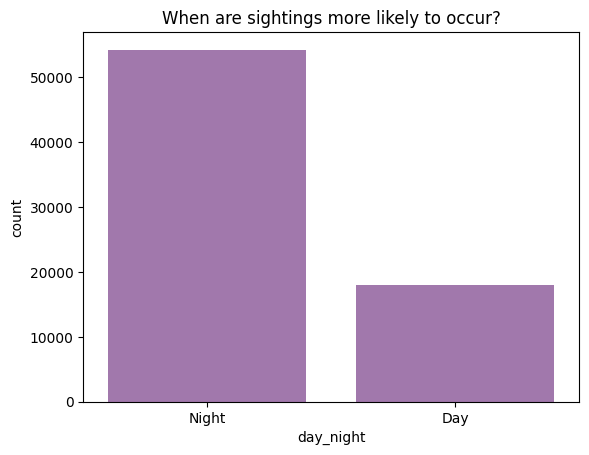

In [81]:
sns.countplot(data=df, x='day_night', order=df.day_night.value_counts().index, color='#a66fb5').set_title('When are sightings more likely to occur?');

<p><b>4. What states have the most sightings?

In [82]:
# looking at data in the US only
usa_df = df[df['state'].isin(states)]

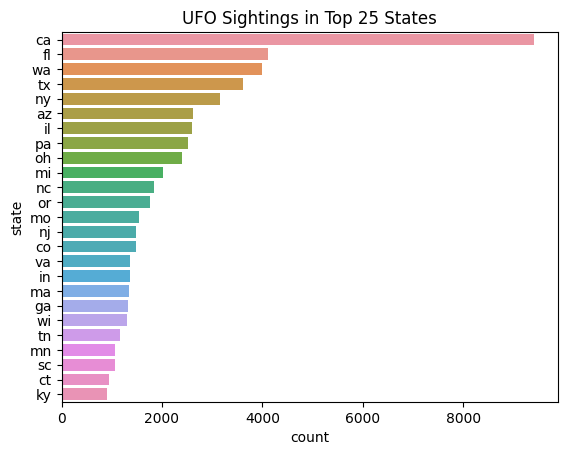

In [83]:
sns.countplot(data=usa_df, y='state', order=usa_df.state.value_counts()[:25].index).set_title('UFO Sightings in Top 25 States');

<p><b>5. How long do sightings last on average?

In [84]:
df['duration'].agg(['min', 'max'])

min    0:00:00
max    9:00:00
Name: duration, dtype: object

A few sightings reported to be as long as 9 hours!

In [85]:
df.sort_values('duration', ascending=False)

,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude,datetime_updated,date,time,day,duration,day_night
45350,lewiston,mi,us,other,32400.0,what we saw was real&#44 and the goverment kno...,2007-06-12,44.8839,-84.3056,2007-05-03 22:30:00,2007-05-03,22:30:00,Thursday,9:00:00,Night
47021,mississippi (rural; hitchhiking),ms,us,circle,32400.0,Myself and a friend are missing time after see...,2008-08-12,32.3547,-89.3985,1968-06-01 22:00:00,1968-06-01,22:00:00,Saturday,9:00:00,Night
25393,snohomish,wa,us,light,32400.0,Over hours of continuous blinking light in the...,2003-02-11,47.9131,-122.0969,2003-01-09 21:00:00,2003-01-09,21:00:00,Thursday,9:00:00,Night
46708,lusby,md,us,other,32400.0,Possible alien encounter and or abduction in 1...,2012-08-05,38.4106,-76.4556,1993-06-11 01:00:00,1993-06-11,01:00:00,Friday,9:00:00,Night
32217,cherry valley,ny,us,sphere,32400.0,Red pulsing light over Cherry Valley&#44 NY.,2008-03-31,42.7956,-74.7536,2008-03-18 21:00:00,2008-03-18,21:00:00,Tuesday,9:00:00,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,n./a,tx,us,other,0.5,&quot;Roswell Rod&quot; checks out the Columbi...,2003-04-22,31.9686,-99.9018,2003-02-01 11:00:00,2003-02-01,11:00:00,Saturday,0:00:00,Day
9703,drumright,ok,us,fireball,0.5,white fireball w/blue tail going streight down...,2002-11-20,35.9883,-96.6008,1998-11-16 05:11:00,1998-11-16,05:11:00,Monday,0:00:00,Night
22752,westerly,ri,us,fireball,0.5,Intense yellowish white fireball with greenish...,2012-12-20,41.3775,-71.8278,2012-12-05 17:00:00,2012-12-05,17:00:00,Wednesday,0:00:00,Day
59877,columbus,oh,us,circle,0.5,Blue Circle/Flame shooting across sky,2002-08-16,39.9611,-82.9989,2002-07-26 01:07:00,2002-07-26,01:07:00,Friday,0:00:00,Night


Reusing the time() function from section 2 to convert the mean that was calculated from `duration (seconds)`

In [86]:
time_mean = df['duration (seconds)'].mean()
print(time_mean)
print("The average UFO sighting durations is: ",time(time_mean))

6446.053422649406
The average UFO sighting durations is:  1:47:26


----
Bonus: Just for fun. Creating a word cloud of the comments provided for each sighting.

In [87]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

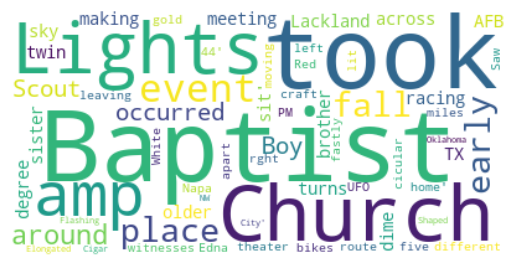

In [88]:
words = df['comments'].values
wordcloud = WordCloud(background_color='white').generate(str(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()